In [197]:
# importing essential libraires for the project 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# importing skicit learn modules for machine learning problems 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

#importing XGboost 
import xgboost as xg
import shap 

In [21]:
# Set some visualization styles
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# loading the dataset 

In [121]:

df = pd.read_csv("churn.csv")
df
#df.head()
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data manipulation


In [123]:
#converting TotalCharges to numeric as it was in object 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [125]:
print(df['TotalCharges'].isnull().sum())

11


In [127]:
# we could see there are 11 null value in TotalCharges ...
# lets remove them 
df.dropna(subset=['TotalCharges'],inplace = True)

In [132]:
# dropping this customerid as it was irrelevant for us 
df = df.drop('customerID', axis=1)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [136]:
# for good dataset lets conver senior citizen calues to yes or no 
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# EDA 

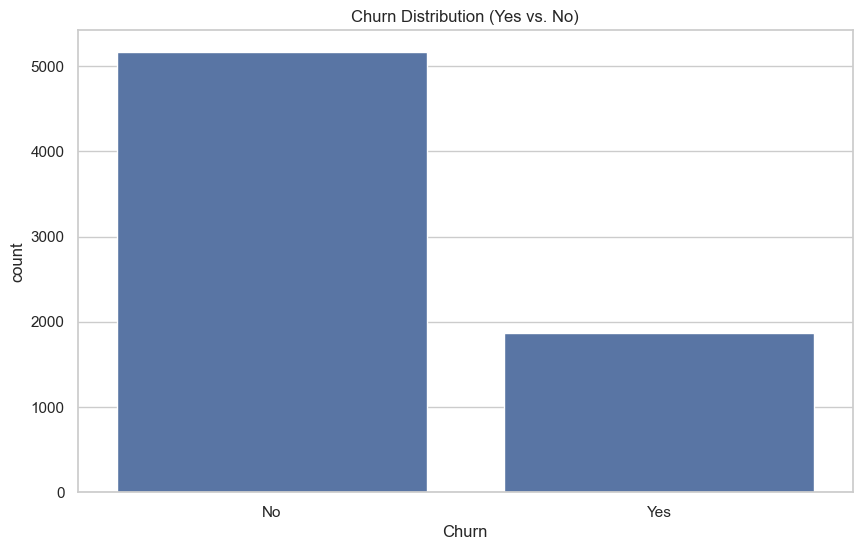

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


In [138]:
#we are done with data cleaning lets proceed to data analysis 
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution (Yes vs. No)')
plt.show()
print(df['Churn'].value_counts(normalize=True))

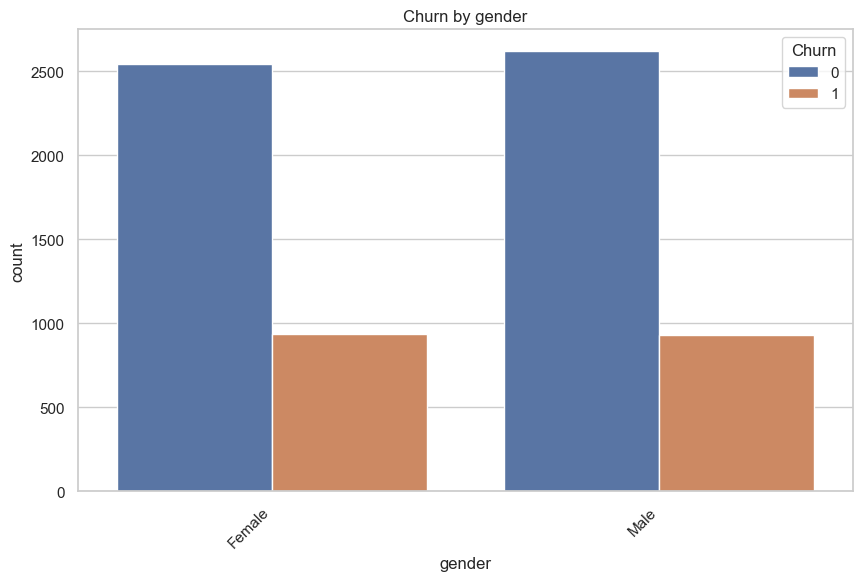

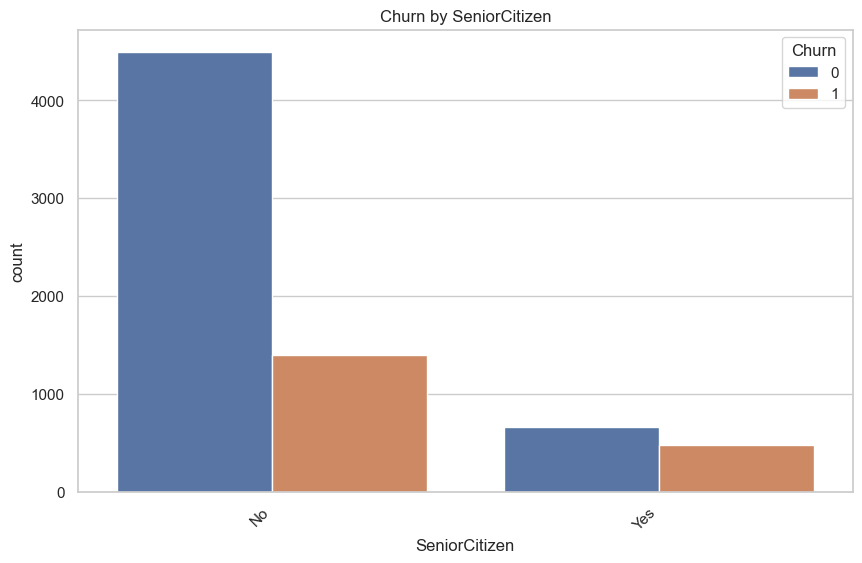

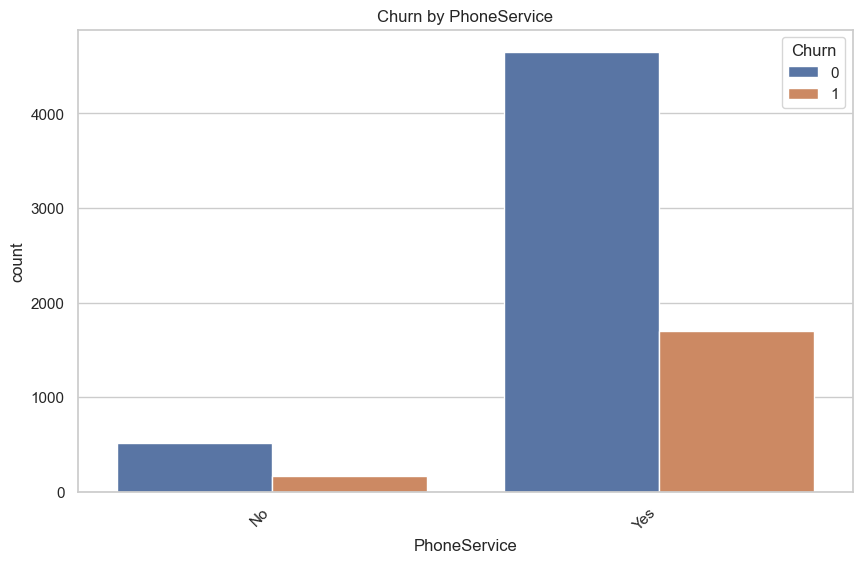

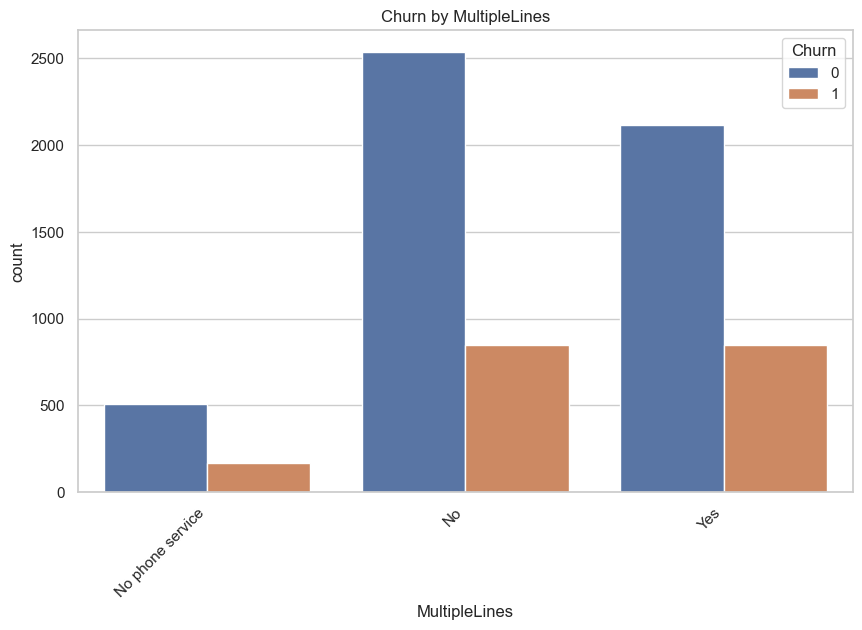

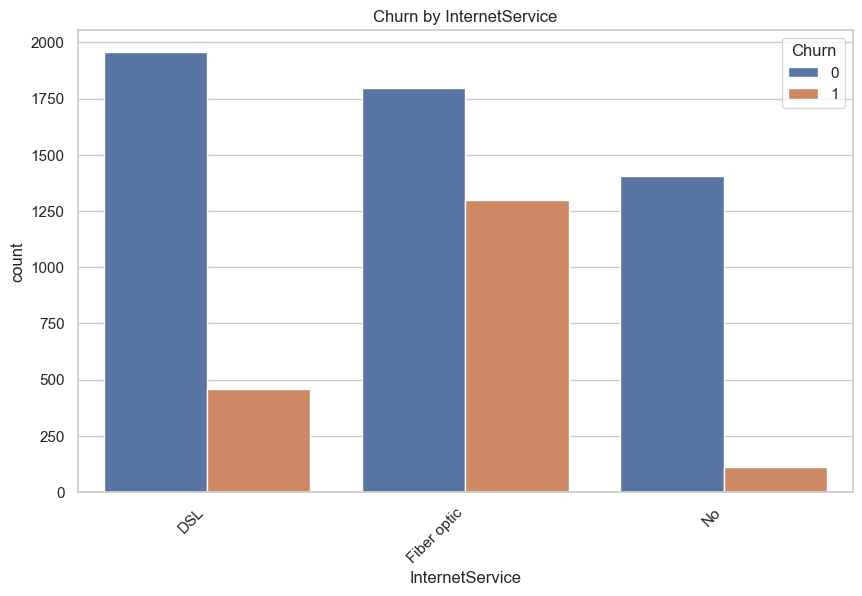

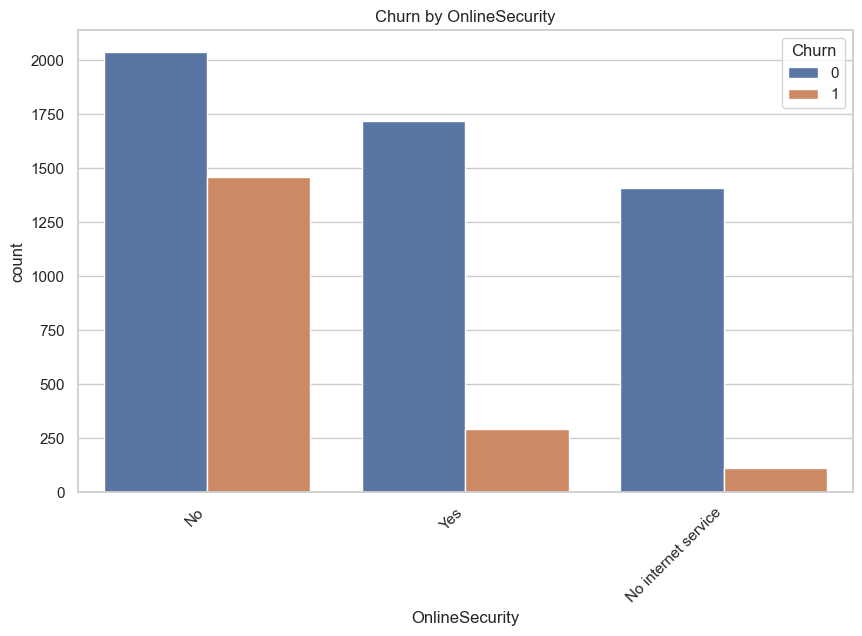

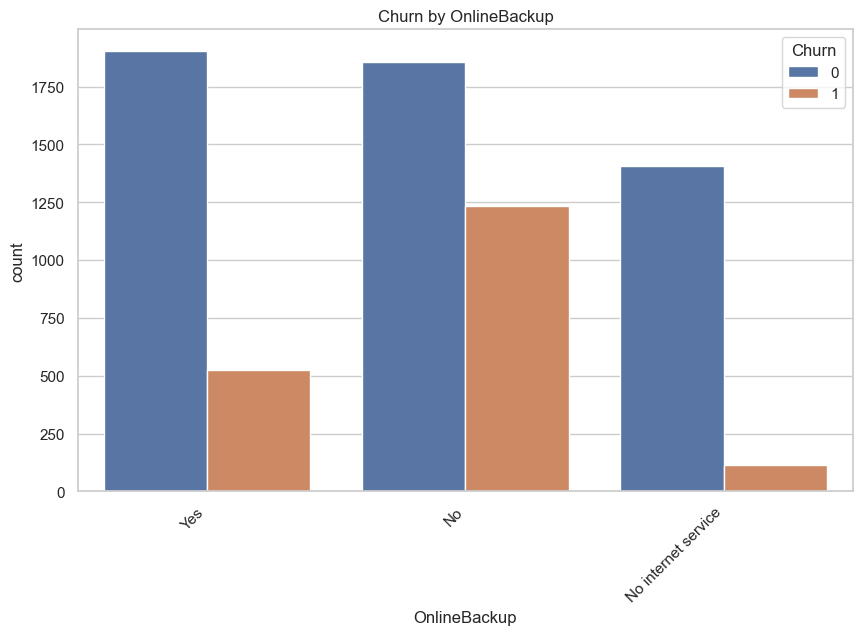

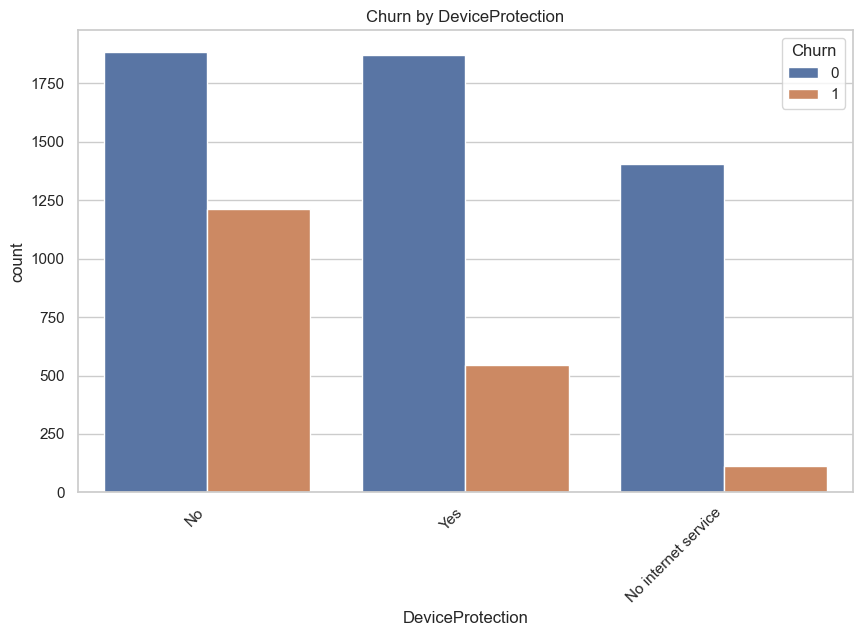

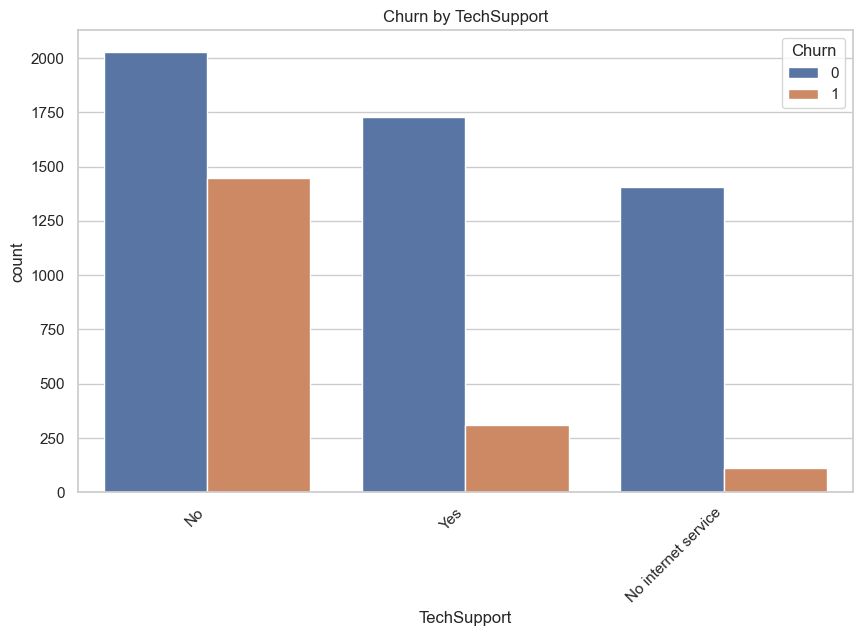

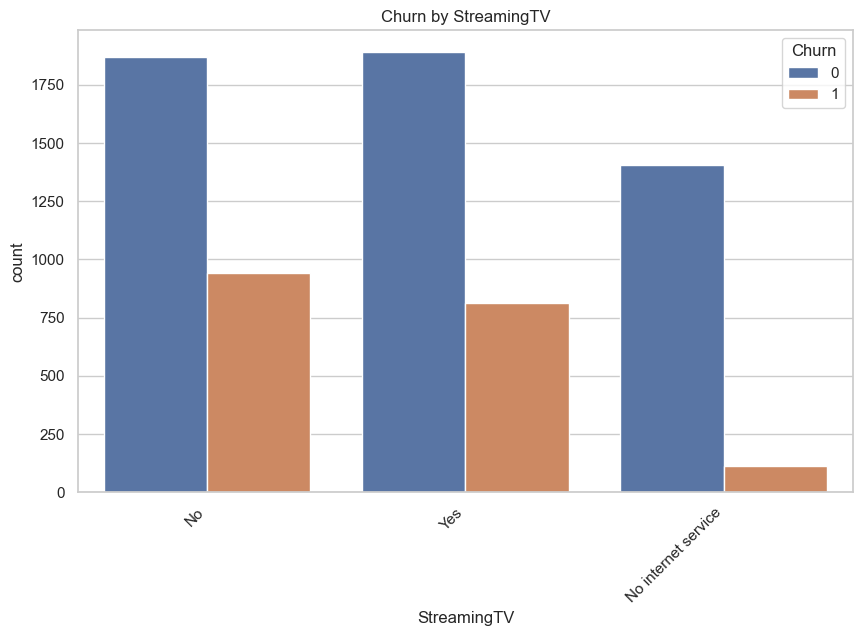

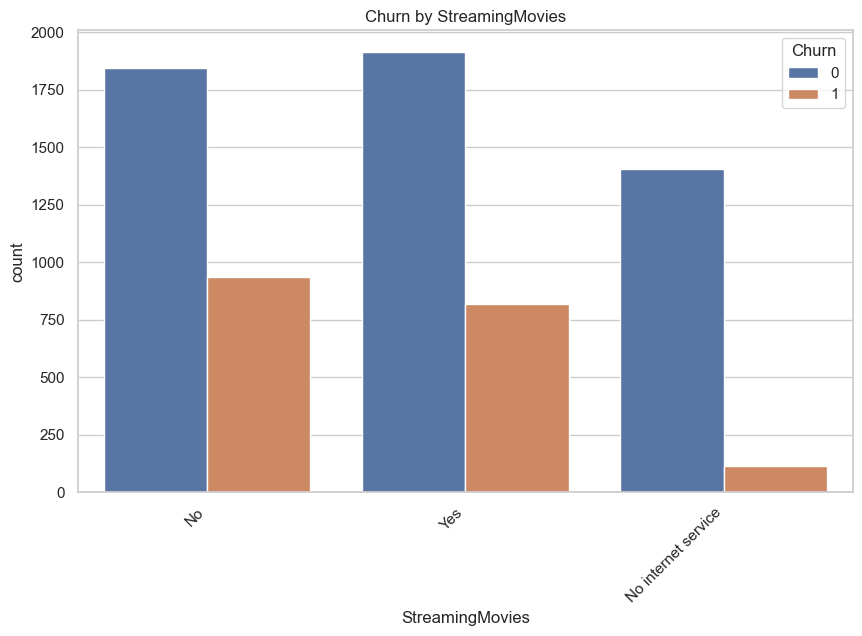

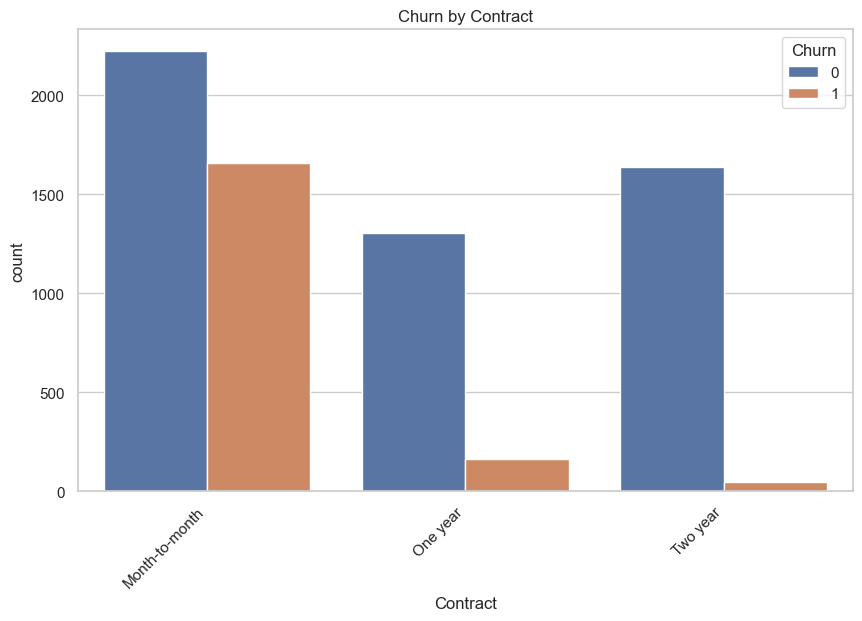

In [189]:
#let us do categorical analysis for some coloumns and they churn analysis 
categorical_features = [
    'gender', 'SeniorCitizen',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 
]

# Creating count plots for each
for col in categorical_features:
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

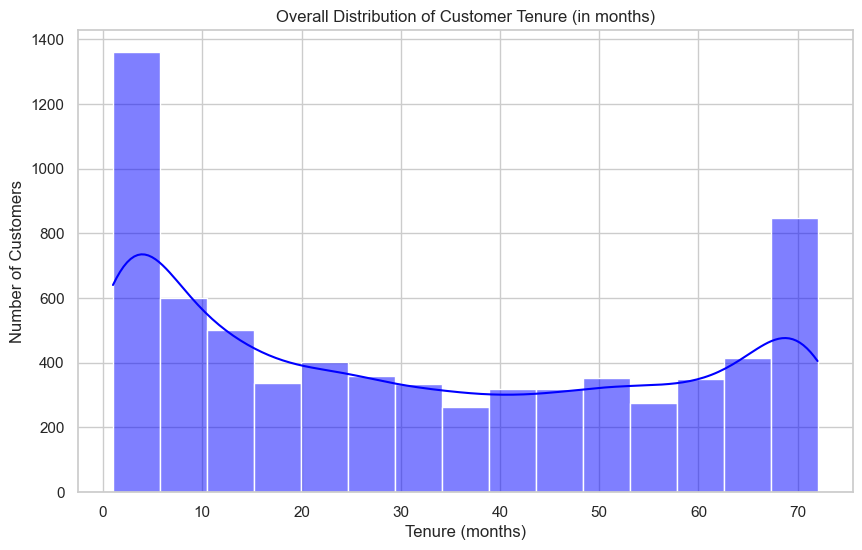

In [142]:
# histogram analysis of customer and tenure they subscribe plan for
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], kde=True, color='blue')
plt.title('Overall Distribution of Customer Tenure (in months)')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()

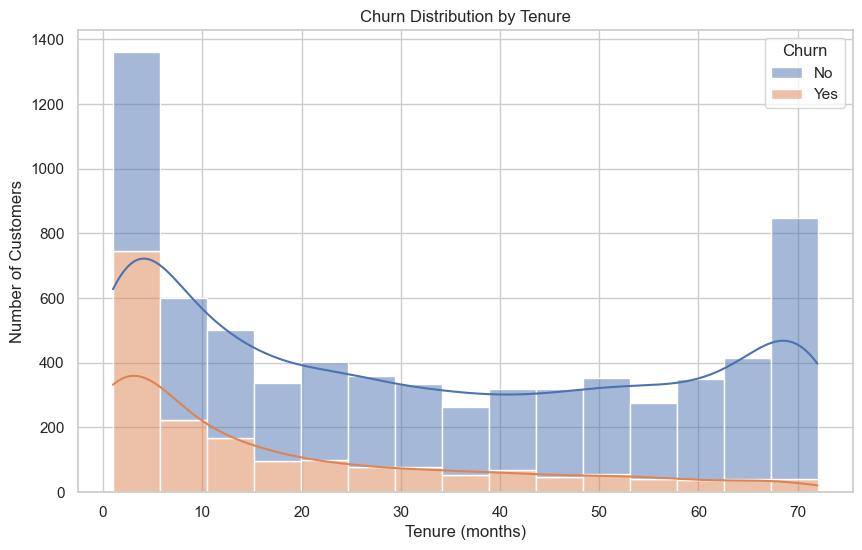

In [144]:
#analysing churn analysis with respecitve to their tenure 
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple="stack", kde=True)
plt.title('Churn Distribution by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()

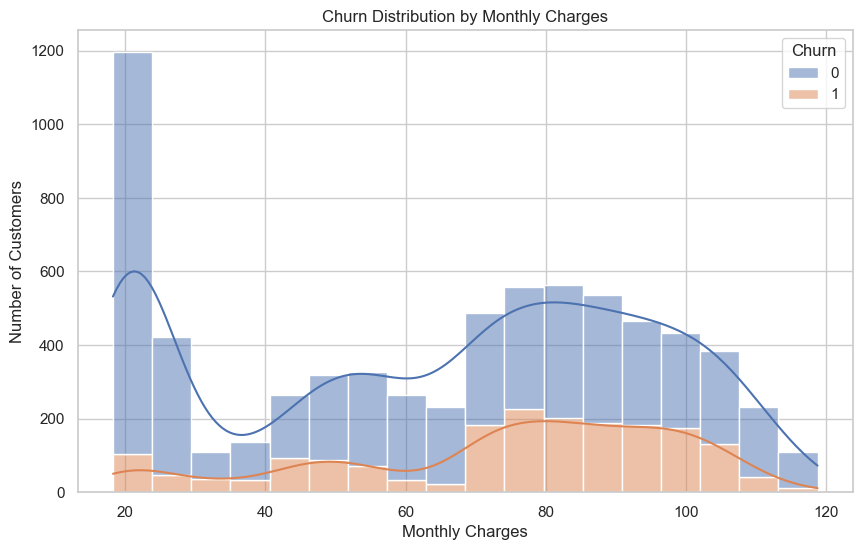

In [191]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple="stack", kde=True)
plt.title('Churn Distribution by Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.show()

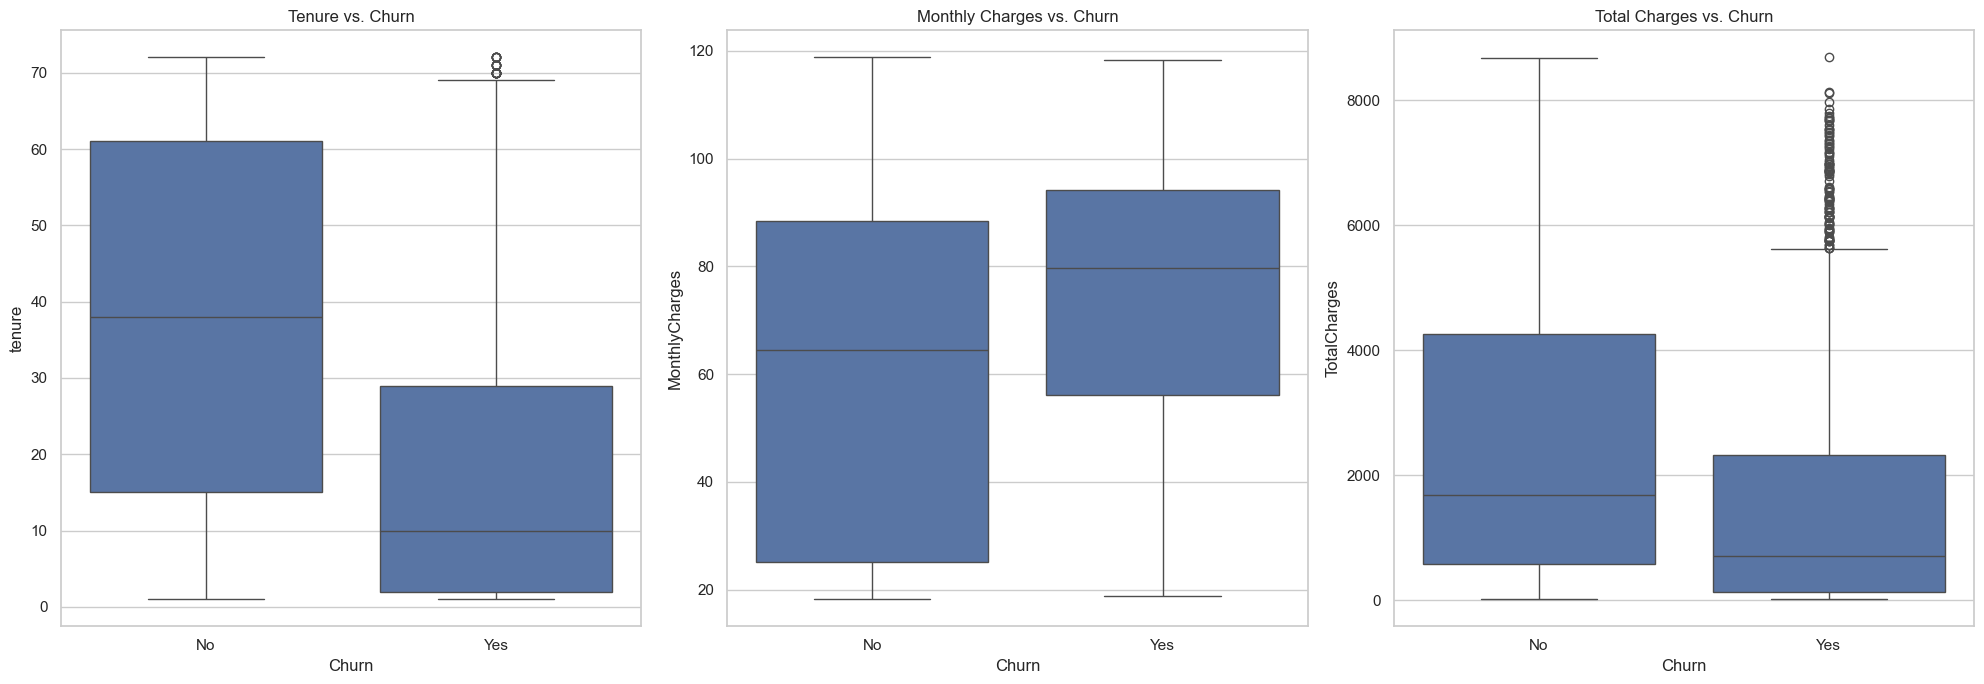

In [148]:
# Create a 1x3 grid for our plots
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
#Tenure vs Churn
sns.boxplot(data=df, x='Churn', y='tenure', ax=axes[0])
axes[0].set_title('Tenure vs. Churn')
#MonthlyCharges vs Churn
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', ax=axes[1])
axes[1].set_title('Monthly Charges vs. Churn')
#TotalCharges vs Churn
sns.boxplot(data=df, x='Churn', y='TotalCharges', ax=axes[2])
axes[2].set_title('Total Charges vs. Churn')

plt.tight_layout()
plt.show()

In [153]:
#for better understanding let convert chrun coloumn values to 0 and 1 
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Model Building

In [155]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [157]:
#Identify which columns are categorical and which are numerical
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = [c for c in X.columns if c not in numerical_cols]

In [159]:
#Createing preprocessing pipeline


# Create transformer for numerical features (scale them)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create transformer for categorical features (one-hot encode them)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [161]:
Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (5625, 19), Test shape: (1407, 19)


In [163]:
# we saw that our Data is imbalance like there are more yes than no so we Handle Class Imbalance through xgboost scale pos weight 

scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"Scale Pos Weight: {scale_pos_weight}")

Scale Pos Weight: 2.762541806020067


In [167]:
#Create the XGBoost Model Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xg.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        scale_pos_weight=scale_pos_weight,
        random_state=42
    ))
])

In [193]:
#Train the model
model_pipeline.fit(X_train, y_train)

C:\Users\MSI PC\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:199: UserWarning: [14:03:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [171]:
#Evaluate the model
y_pred = model_pipeline.predict(X_test)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]

In [195]:
#evaluation metrics 
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Will Churn']))
print(confusion_matrix(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_proba))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    No Churn       0.87      0.77      0.81      1033
  Will Churn       0.51      0.67      0.58       374

    accuracy                           0.74      1407
   macro avg       0.69      0.72      0.70      1407
weighted avg       0.77      0.74      0.75      1407

[[794 239]
 [123 251]]
0.8103765575578115
0.7427149964463398


## Hyperparameter Tuning (RandomizedSearchCV)


In [216]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200, 300, 500],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 4, 5, 6, 8],
    'classifier__subsample': [0.7, 0.8, 1.0],
    'classifier__colsample_bytree': [0.7, 0.8, 1.0]
}


In [208]:

random_search = RandomizedSearchCV(
    model_pipeline,  
    param_distributions=param_grid,
    n_iter=50,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
    random_state=42,
    verbose=2
)


In [210]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\MSI PC\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:199: UserWarning: [15:02:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'classifier__colsample_bytree': [0.7, 0.8, ...], 'classifier__learning_rate': [0.01, 0.05, ...], 'classifier__max_depth': [3, 4, ...], 'classifier__n_estimators': [100, 200, ...], ...}"
,n_iter,50
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [251]:
best_model = random_search.best_estimator_
print(random_search.best_params_)

{'classifier__subsample': 0.8, 'classifier__n_estimators': 500, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.01, 'classifier__colsample_bytree': 0.7}


In [214]:
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]

print(f"Tuned Model ROC AUC: {roc_auc_score(y_test, y_pred_proba_tuned):.4f}")
print(classification_report(y_test, y_pred_tuned, target_names=['No Churn', 'Will Churn']))

Tuned Model ROC AUC: 0.8406
              precision    recall  f1-score   support

    No Churn       0.91      0.70      0.79      1033
  Will Churn       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407



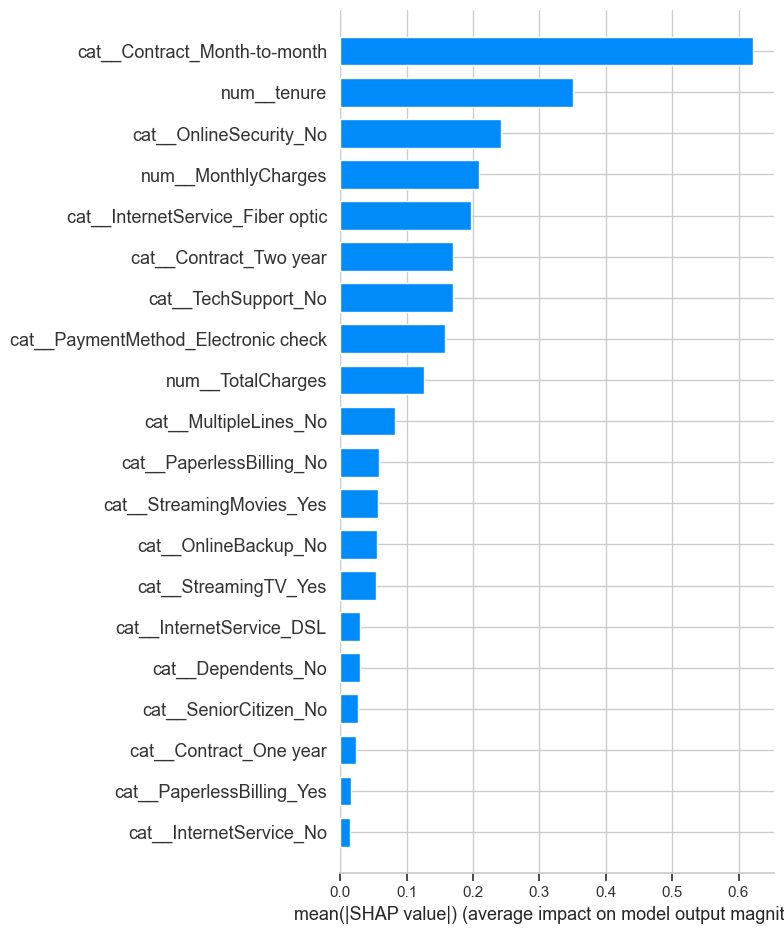

In [253]:
import shap

tuned_model = best_model.named_steps['classifier']

#Getpreprocessor from the pipeline
preprocessor_fitted = best_model.named_steps['preprocessor']
X_train_transformed = preprocessor_fitted.transform(X_train)

#Get the feature names 
feature_names = preprocessor_fitted.get_feature_names_out()

#Creating the SHAP Explainer
explainer = shap.TreeExplainer(tuned_model)
shap_values = explainer.shap_values(X_train_transformed)

shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names, plot_type="bar")


In [255]:
# We need the tuned model's probabilities to find a high-risk customer
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]

# Transform X_test data for SHAP
X_test_transformed = preprocessor_fitted.transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)

# Find a customer who is >80% sure will churn
high_risk_customer_index = np.where(y_pred_proba_tuned > 0.8)[0][0]

# Get SHAP values for the test set
shap_values_test = explainer.shap_values(X_test_transformed)

# Load the SHAP javascript (run this in a cell first if you get an error)
shap.initjs()

# Create the force plot for this one customer
shap.force_plot(
    explainer.expected_value,
    shap_values_test[high_risk_customer_index, :],
    X_test_transformed_df.iloc[high_risk_customer_index, :],
)

### possible Prescribed action for possible churners from the subscription

In [257]:

def prescribe_action(customer_data):
    reasons = []
    actions = []
    
    # Rule 1: Contract
    if customer_data['Contract'] == 'Month-to-month':
        reasons.append("Month-to-month Contract")
        actions.append("Offer 15% discount to switch to a 1-year contract.")

    # Rule 2: Tech Support / Online Security
    if customer_data['TechSupport'] == 'No' or customer_data['OnlineSecurity'] == 'No':
        reasons.append("No Tech Support or Online Security")
        actions.append("Offer 6-month free trial of Premium Tech Support & Security bundle.")

    # Rule 3: High Charges (Fiber)
    if customer_data['InternetService'] == 'Fiber optic' and customer_data['MonthlyCharges'] > 90:
        reasons.append("High Monthly Charges (Fiber)")
        actions.append("Offer a $10/mo loyalty credit for 12 months.")
        
    # Rule 4: Low Tenure
    if customer_data['tenure'] < 12:
        reasons.append("New Customer (Low Tenure)")
        actions.append("Send a 'Welcome' email with a free movie rental (from StreamingMovies).")

    # Fallback
    if not actions:
        reasons.append("General Risk")
        actions.append("Flag for a standard retention call from a customer service rep.")
        
    return ", ".join(reasons), ", ".join(list(set(actions)))


## one possible customer analysis 

In [259]:
customer_original_data = X_test.iloc[high_risk_customer_index]

print(f"\n Prescribing Action for Customer {high_risk_customer_index} (from Tuned Model)")
print(customer_original_data)

reasons, actions = prescribe_action(customer_original_data)
print(f"\nCHURN REASONS: {reasons}")
print(f"PRESCRIPTION: {actions}")


 Prescribing Action for Customer 1 (from Tuned Model)
gender                                 Female
SeniorCitizen                              No
Partner                                    No
Dependents                                 No
tenure                                      7
PhoneService                              Yes
MultipleLines                             Yes
InternetService                   Fiber optic
OnlineSecurity                             No
OnlineBackup                              Yes
DeviceProtection                           No
TechSupport                                No
StreamingTV                                No
StreamingMovies                            No
Contract                       Month-to-month
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          78.55
TotalCharges                           522.95
Name: 619, dtype: object

CHURN REASONS: Month-to-month Contract, No Te

# ROI ANALYSIS

In [242]:

#State your assumptions 
ASSUMED_INTERVENTION_SUCCESS_RATE = 0.30  # 30% of customers who get an offer will stay
ASSUMED_AVG_INTERVENTION_COST = 25.00     # Avg $25 cost (e.g., $10 discount for 2 mo, etc.)
AVG_MONTHLY_REVENUE = df['MonthlyCharges'].mean()
CUSTOMER_LIFETIME_MONTHS = 18             # Assumed avg lifetime of a retained customer


#CLV

In [232]:
#Calculate Customer Lifetime Value (CLV)
clv = AVG_MONTHLY_REVENUE * CUSTOMER_LIFETIME_MONTHS
print(f"Assumed Avg Monthly Revenue: ${AVG_MONTHLY_REVENUE:.2f}")
print(f"Assumed Avg Retained Lifetime: {CUSTOMER_LIFETIME_MONTHS} months")
print(f"CALCULATED CUSTOMER LIFETIME VALUE (CLV): ${clv:.2f}")


Assumed Avg Monthly Revenue: $64.80
Assumed Avg Retained Lifetime: 18 months
CALCULATED CUSTOMER LIFETIME VALUE (CLV): $1166.37


In [234]:
#Identify all high-risk customers (using TUNED model's probabilities)
high_risk_indices = np.where(y_pred_proba_tuned > 0.8)[0] # <-- Uses tuned probabilities
num_high_risk = len(high_risk_indices)
print(f"\nFound {num_high_risk} high-risk customers (Prob > 80%) in the test set.")


Found 188 high-risk customers (Prob > 80%) in the test set.


In [238]:
#Calculate the Cost vs. Benefit
total_intervention_cost = num_high_risk * ASSUMED_AVG_INTERVENTION_COST
customers_retained = num_high_risk * ASSUMED_INTERVENTION_SUCCESS_RATE
total_value_saved = customers_retained * clv
net_profit = total_value_saved - total_intervention_cost


In [240]:
print(f"Total Cost of Intervention: {num_high_risk} * ${ASSUMED_AVG_INTERVENTION_COST:.2f} = ${total_intervention_cost:.2f}")
print(f"Customers Retained (at {ASSUMED_INTERVENTION_SUCCESS_RATE*100}% rate): {customers_retained:.0f}")
print(f"Total Value Saved: {customers_retained:.0f} * ${clv:.2f} = ${total_value_saved:.2f}")
print(f"\n*** NET PROFIT from Tuned Retention Engine: ${net_profit:.2f} ***")

Total Cost of Intervention: 188 * $25.00 = $4700.00
Customers Retained (at 30.0% rate): 56
Total Value Saved: 56 * $1166.37 = $65783.14

*** NET PROFIT from Tuned Retention Engine: $61083.14 ***
